**....................................................................................................DISEASE RECOGNITION USING SYMPTOMS..................................................................................................**

LOADING THE DATASET

In [2]:
import pandas as pd
import numpy as np

file_path = r"C:\Users\Dell\Downloads\diseases.csv"

df_original= pd.read_csv(file_path)
df_original.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dimorphic hemmorhoids(piles)
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Varicose veins
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Osteoarthristis


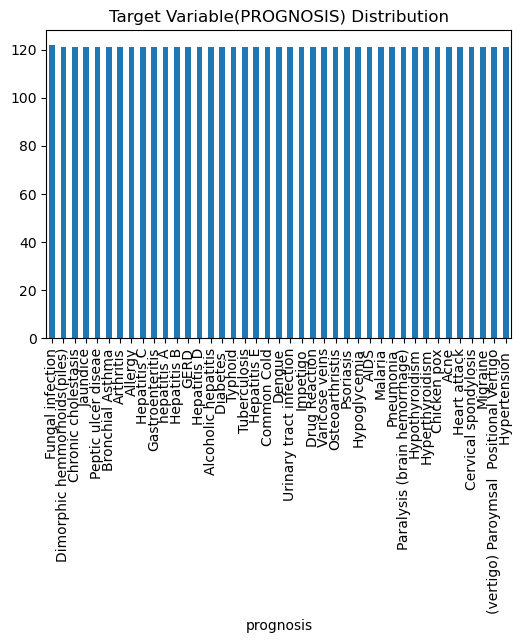

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# Analyze the distribution of the target variable
df_original['prognosis'].value_counts().plot(kind="bar", figsize=(6, 4))
plt.title("Target Variable(PROGNOSIS) Distribution")
plt.show()


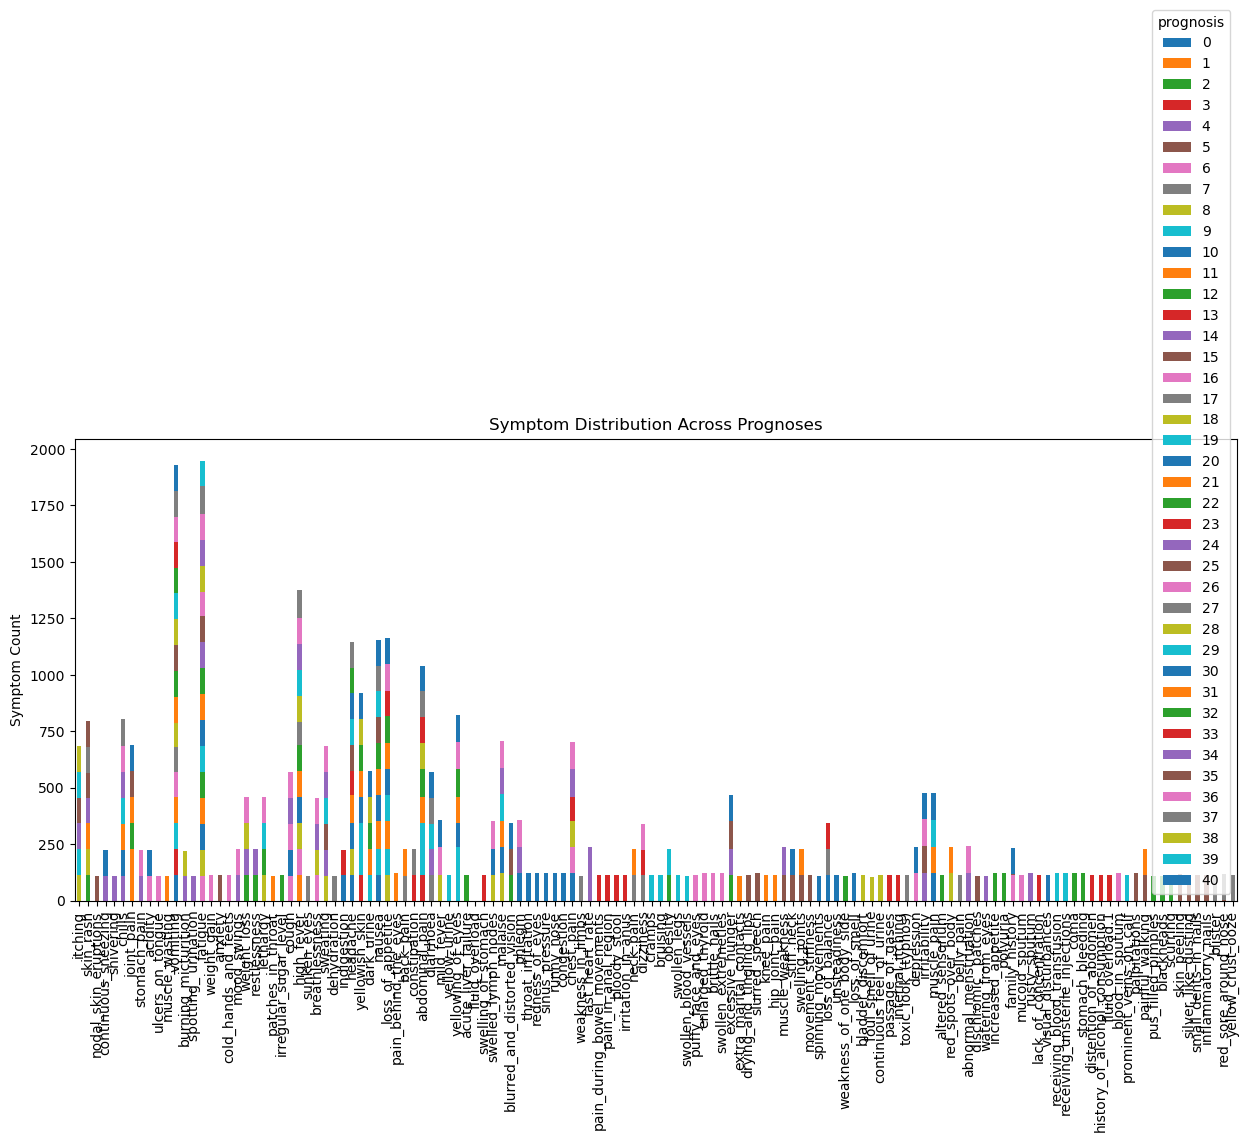

In [44]:
grouped_data = df_original.groupby('prognosis').sum()
grouped_data.T.plot(kind='bar', stacked=True, figsize=(15, 6), title="Symptom Distribution Across Prognoses")
plt.ylabel("Symptom Count")
plt.show()

LABEL ENCODING THE "PROGNOSIS" COLUMN

In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'diseases' column
encoder = LabelEncoder()
df_original['prognosis'] = encoder.fit_transform(df_original['prognosis'])

# Save the encoding mappings
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Label encoding mapping for prognosis:", label_mapping)

Label encoding mapping for prognosis: {'(vertigo) Paroymsal  Positional Vertigo': 0, 'AIDS': 1, 'Acne': 2, 'Alcoholic hepatitis': 3, 'Allergy': 4, 'Arthritis': 5, 'Bronchial Asthma': 6, 'Cervical spondylosis': 7, 'Chicken pox': 8, 'Chronic cholestasis': 9, 'Common Cold': 10, 'Dengue': 11, 'Diabetes ': 12, 'Dimorphic hemmorhoids(piles)': 13, 'Drug Reaction': 14, 'Fungal infection': 15, 'GERD': 16, 'Gastroenteritis': 17, 'Heart attack': 18, 'Hepatitis B': 19, 'Hepatitis C': 20, 'Hepatitis D': 21, 'Hepatitis E': 22, 'Hypertension ': 23, 'Hyperthyroidism': 24, 'Hypoglycemia': 25, 'Hypothyroidism': 26, 'Impetigo': 27, 'Jaundice': 28, 'Malaria': 29, 'Migraine': 30, 'Osteoarthristis': 31, 'Paralysis (brain hemorrhage)': 32, 'Peptic ulcer diseae': 33, 'Pneumonia': 34, 'Psoriasis': 35, 'Tuberculosis': 36, 'Typhoid': 37, 'Urinary tract infection': 38, 'Varicose veins': 39, 'hepatitis A': 40}


CREATING NEW DATASETS AFTER IMPUTATION

In [6]:
# Exclude the last column (label-encoded prognosis) from modification
prognosis_col = df_original.columns[-1]

# Randomly introduce NaN values into non-prognosis columns
np.random.seed(42)  # For reproducibility
nan_probability = 0.1  # 10% of the values will be set to NaN

# Create a copy of the original dataset to introduce NaN values
df_with_nulls = df_original.copy()

# Introduce NaN values in non-prognosis columns
for col in df_with_nulls.columns[:-1]:  # Exclude prognosis column
    df_with_nulls.loc[df_with_nulls.sample(frac=nan_probability).index, col] = np.nan

# Impute missing values using Min, Max, and Mode strategies
df_min_imputed = df_with_nulls.fillna(df_with_nulls.min(numeric_only=True))
df_max_imputed = df_with_nulls.fillna(df_with_nulls.max(numeric_only=True))
df_mode_imputed = df_with_nulls.fillna(df_with_nulls.mode().iloc[0])

# Inspect the imputed datasets
print("Min Imputed Dataset:\n", df_min_imputed.head())
print("Max Imputed Dataset:\n", df_max_imputed.head())
print("Mode Imputed Dataset:\n", df_mode_imputed.head())


Min Imputed Dataset:
    itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0      0.0        0.0                   0.0                  0.0        0.0   
1      0.0        0.0                   0.0                  0.0        0.0   
2      1.0        0.0                   0.0                  0.0        0.0   
3      0.0        0.0                   0.0                  0.0        0.0   
4      0.0        0.0                   0.0                  0.0        0.0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0     0.0         0.0           0.0      0.0               0.0  ...   
1     0.0         0.0           0.0      0.0               0.0  ...   
2     0.0         0.0           1.0      0.0               0.0  ...   
3     0.0         0.0           0.0      0.0               0.0  ...   
4     0.0         1.0           0.0      0.0               0.0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0         0.0 

Train-Test Split:

In [7]:
from sklearn.model_selection import train_test_split

# Ensure there are no null values in the datasets
assert not df_original.isnull().values.any(), "df_original contains null values!"
assert not df_min_imputed.isnull().values.any(), "df_min_imputed contains null values!"
assert not df_max_imputed.isnull().values.any(), "df_max_imputed contains null values!"
assert not df_mode_imputed.isnull().values.any(), "df_mode_imputed contains null values!"

# Separate features (X) and target (y) for each dataset
X_original = df_original.iloc[:, :-1]
y_original = df_original.iloc[:, -1]

X_min_imputed = df_min_imputed.iloc[:, :-1]
y_min_imputed = df_min_imputed.iloc[:, -1]

X_max_imputed = df_max_imputed.iloc[:, :-1]
y_max_imputed = df_max_imputed.iloc[:, -1]

X_mode_imputed = df_mode_imputed.iloc[:, :-1]
y_mode_imputed = df_mode_imputed.iloc[:, -1]

# Train-test split for each dataset
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42
)

X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(
    X_min_imputed, y_min_imputed, test_size=0.2, random_state=42
)

X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(
    X_max_imputed, y_max_imputed, test_size=0.2, random_state=42
)

X_train_mode, X_test_mode, y_train_mode, y_test_mode = train_test_split(
    X_mode_imputed, y_mode_imputed, test_size=0.2, random_state=42
)

# Print confirmation
print("Datasets have been split into training and testing sets successfully!")


Datasets have been split into training and testing sets successfully!


In [8]:
# Original Dataset
print("Original Dataset:")
print("X_train_original:\n", X_train_original.head())
print("y_train_original:\n", y_train_original.head())
print("X_test_original:\n", X_test_original.head())
print("y_test_original:\n", y_test_original.head())


Original Dataset:
X_train_original:
       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
2414        0          0                     0                    0   
2215        0          0                     0                    0   
3372        0          0                     0                    0   
80          1          1                     0                    0   
803         0          0                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
2414          0       0           0             0        0                 0   
2215          0       1           0             0        0                 0   
3372          0       0           0             0        0                 0   
80            0       0           0             1        0                 0   
803           0       0           0             0        0                 0   

      ...  pus_filled_pimples  blackheads  scurring  sk

In [9]:
# Min Imputed Dataset
print("Min Imputed Dataset:")
print("X_train_min:\n", X_train_min.head())
print("y_train_min:\n", y_train_min.head())
print("X_test_min:\n", X_test_min.head())
print("y_test_min:\n", y_test_min.head())


Min Imputed Dataset:
X_train_min:
       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
2414      0.0        0.0                   0.0                  0.0   
2215      0.0        0.0                   0.0                  0.0   
3372      0.0        0.0                   0.0                  0.0   
80        1.0        0.0                   0.0                  0.0   
803       0.0        0.0                   0.0                  0.0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
2414        0.0     0.0         0.0           0.0      0.0               0.0   
2215        0.0     1.0         0.0           0.0      0.0               0.0   
3372        0.0     0.0         0.0           0.0      0.0               0.0   
80          0.0     0.0         0.0           1.0      0.0               0.0   
803         0.0     0.0         0.0           0.0      0.0               0.0   

      ...  pus_filled_pimples  blackheads  scurring  skin

In [10]:
# Max Imputed Dataset
print("Max Imputed Dataset:")
print("X_train_max:\n", X_train_max.head())
print("y_train_max:\n", y_train_max.head())
print("X_test_max:\n", X_test_max.head())
print("y_test_max:\n", y_test_max.head())

Max Imputed Dataset:
X_train_max:
       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
2414      0.0        0.0                   0.0                  0.0   
2215      0.0        0.0                   0.0                  0.0   
3372      0.0        0.0                   0.0                  0.0   
80        1.0        1.0                   0.0                  0.0   
803       0.0        0.0                   0.0                  1.0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
2414        0.0     0.0         0.0           1.0      0.0               0.0   
2215        0.0     1.0         0.0           1.0      0.0               0.0   
3372        0.0     0.0         0.0           1.0      0.0               0.0   
80          0.0     0.0         0.0           1.0      0.0               0.0   
803         0.0     0.0         0.0           0.0      0.0               1.0   

      ...  pus_filled_pimples  blackheads  scurring  skin

In [11]:
# Mode Imputed Dataset
print("Mode Imputed Dataset:")
print("X_train_mode:\n", X_train_mode.head())
print("y_train_mode:\n", y_train_mode.head())
print("X_test_mode:\n", X_test_mode.head())
print("y_test_mode:\n", y_test_mode.head())

Mode Imputed Dataset:
X_train_mode:
       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
2414      0.0        0.0                   0.0                  0.0   
2215      0.0        0.0                   0.0                  0.0   
3372      0.0        0.0                   0.0                  0.0   
80        1.0        0.0                   0.0                  0.0   
803       0.0        0.0                   0.0                  0.0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
2414        0.0     0.0         0.0           0.0      0.0               0.0   
2215        0.0     1.0         0.0           0.0      0.0               0.0   
3372        0.0     0.0         0.0           0.0      0.0               0.0   
80          0.0     0.0         0.0           1.0      0.0               0.0   
803         0.0     0.0         0.0           0.0      0.0               0.0   

      ...  pus_filled_pimples  blackheads  scurring  sk

In [12]:
# Function to validate the presence of NaN values and check data types
def validate_data(X, y, dataset_name):
    print(f"\n### Validation for {dataset_name} ###")
    
    # Check for NaN values in features and target
    print(f"Number of NaN values in X ({dataset_name}): {X.isnull().sum().sum()}")
    print(f"Number of NaN values in y ({dataset_name}): {y.isnull().sum()}")
    
    # Check data types
    print(f"Data types of X ({dataset_name}):\n{X.dtypes}")
    print(f"Data type of y ({dataset_name}): {y.dtype}")
    
    # Check for unique values in the target (optional sanity check)
    print(f"Unique values in y ({dataset_name}): {y.unique()}")
    print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

# Validate Original Dataset
validate_data(X_original, y_original, "Original")

# Validate Min-Imputed Dataset
validate_data(X_min_imputed, y_min_imputed, "Min Imputed")

# Validate Max-Imputed Dataset
validate_data(X_max_imputed, y_max_imputed, "Max Imputed")

# Validate Mode-Imputed Dataset
validate_data(X_mode_imputed, y_mode_imputed, "Mode Imputed")



### Validation for Original ###
Number of NaN values in X (Original): 0
Number of NaN values in y (Original): 0
Data types of X (Original):
itching                 int64
skin_rash               int64
nodal_skin_eruptions    int64
continuous_sneezing     int64
shivering               int64
                        ...  
small_dents_in_nails    int64
inflammatory_nails      int64
blister                 int64
red_sore_around_nose    int64
yellow_crust_ooze       int64
Length: 132, dtype: object
Data type of y (Original): int32
Unique values in y (Original): [13 38 14 39 31 35 25  1 29 34 32 26 24  8  2 18  7 30  0 27 11 19 10 28
 33  6  5  4 20 17  9 40 16 21  3 12 15 37 36 22 23]
Shape of X: (4962, 132), Shape of y: (4962,)

### Validation for Min Imputed ###
Number of NaN values in X (Min Imputed): 0
Number of NaN values in y (Min Imputed): 0
Data types of X (Min Imputed):
itching                 float64
skin_rash               float64
nodal_skin_eruptions    float64
continuous_sneezin

CLASSIFICATION MODELS:

SVM for Original Dataset

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate SVM on a dataset
def svm_classification(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n### SVM Classification for {dataset_name} ###")
    
    # Train the SVM classifier
    svm = SVC()
    svm.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = svm.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform SVM classification and evaluation
svm_classification(X_train_original, X_test_original, y_train_original, y_test_original, "Original Dataset")


### SVM Classification for Original Dataset ###
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        24
          11       1.00      1.00     

KNN for Original Dataset

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate KNN on a dataset
def knn_classification(X_train, X_test, y_train, y_test, dataset_name, n_neighbors=5):
    print(f"\n### KNN Classification for {dataset_name} ###")
    # Train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # Predict the test set
    y_pred = knn.predict(X_test)
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)  
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")
# Perform KNN classification and evaluation 
knn_classification(X_train_original, X_test_original, y_train_original, y_test_original, "Original Dataset")



### KNN Classification for Original Dataset ###
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        24
          11       1.00      1.00     

Decision Tree for Original Dataset

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate Decision Tree on a dataset
def decision_tree_classification(X_train, X_test, y_train, y_test, dataset_name, max_depth=None):
    print(f"\n### Decision Tree Classification for {dataset_name} ###")
    # Train the Decision Tree classifier
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train) 
    # Predict the test set
    y_pred = dt.predict(X_test)
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}"
# Perform Decision Tree classification and evaluation
decision_tree_classification(X_train_original, X_test_original, y_train_original, y_test_original, "Original Dataset")



### Decision Tree Classification for Original Dataset ###
Accuracy: 0.9990
Precision: 0.9990
Recall: 0.9990
F1 Score: 0.9990
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27
           8       0.97      1.00      0.98        28
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        24
          11       1.00     

Naive Bayes classification on Original Dataset

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate Naive Bayes on a dataset
def naive_bayes_classification(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n### Naive Bayes Classification for {dataset_name} ###")  
    # Train the Naive Bayes classifier
    nb = GaussianNB()
    nb.fit(X_train, y_train)  
    # Predict the test set
    y_pred = nb.predict(X_test)
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=0)
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}"
# Perform Naive Bayes classification on all datasets
naive_bayes_classification(X_train_original, X_test_original, y_train_original, y_test_original, "Original Dataset")



### Naive Bayes Classification for Original Dataset ###
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        24
          11       1.00      1

Neural Networks on Original Dataset

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate Neural Network on a dataset
def neural_network_classification(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n### Neural Network Classification for {dataset_name} ###")
    
    # Train the Neural Network classifier
    nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
    nn.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = nn.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=0)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform Neural Network classification on all datasets
neural_network_classification(X_train_original, X_test_original, y_train_original, y_test_original, "Original Dataset")



### Neural Network Classification for Original Dataset ###
Accuracy: 0.9990
Precision: 0.9990
Recall: 0.9990
F1 Score: 0.9990
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        24
          11       1.00    

Random Forest on Original Dataset

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate Random Forest on a dataset
def random_forest_classification(X_train, X_test, y_train, y_test, dataset_name, n_estimators=100):
    print(f"\n### Random Forest Classification for {dataset_name} ###")
    
    # Train the Random Forest classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=70)
    rf.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = rf.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=0)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform Random Forest classification on all datasets
random_forest_classification(X_train_original, X_test_original, y_train_original, y_test_original, "Original Dataset")



### Random Forest Classification for Original Dataset ###
Accuracy: 0.9990
Precision: 0.9991
Recall: 0.9990
F1 Score: 0.9990
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        24
          11       1.00     

Comparison of Classifiers for Original Dataset

Classifier Metrics (Original Dataset):
       Classifier  Accuracy  Precision  Recall  F1 Score
0             SVM     1.000      1.000   1.000     1.000
1             KNN     1.000      1.000   1.000     1.000
2   Decision Tree     0.999      0.999   0.999     0.999
3   Random Forest     0.999      0.999   0.999     0.999
4  Neural Network     0.999      0.999   0.999     0.999
5     Naive Bayes     1.000      1.000   1.000     1.000


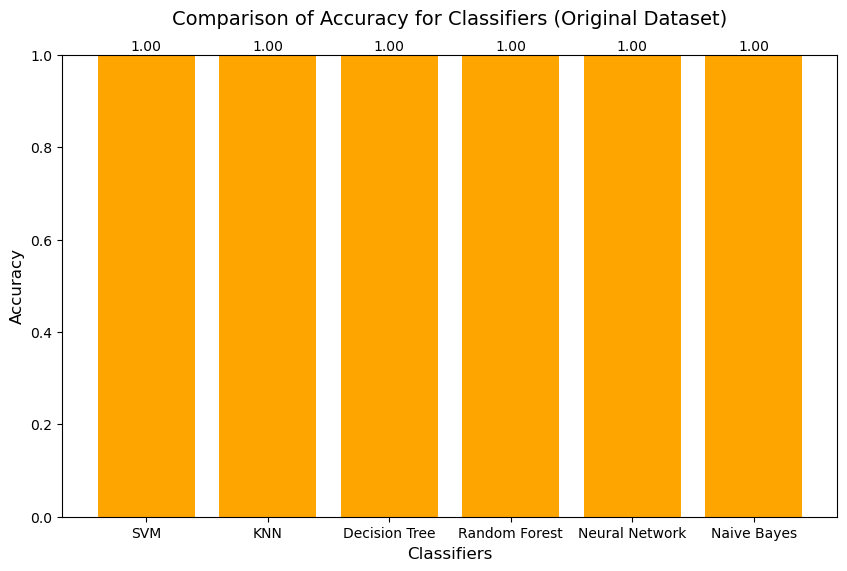

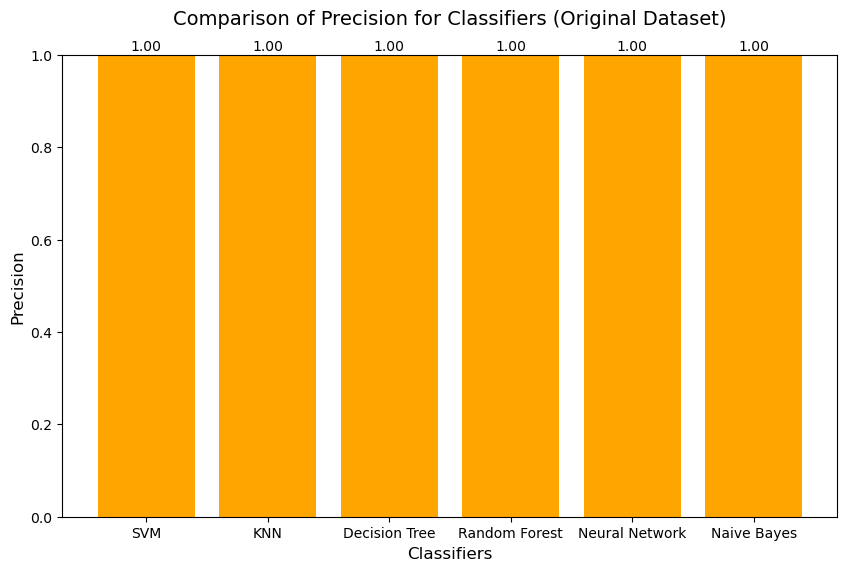

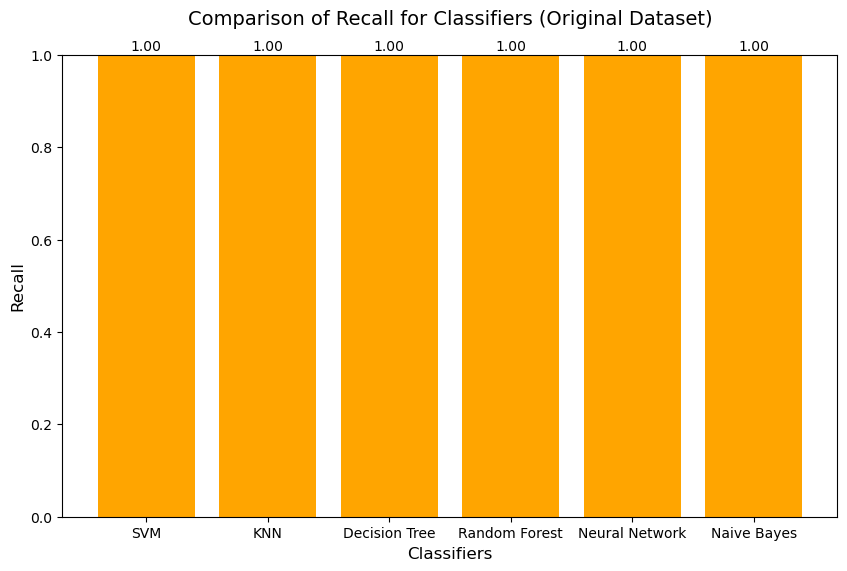

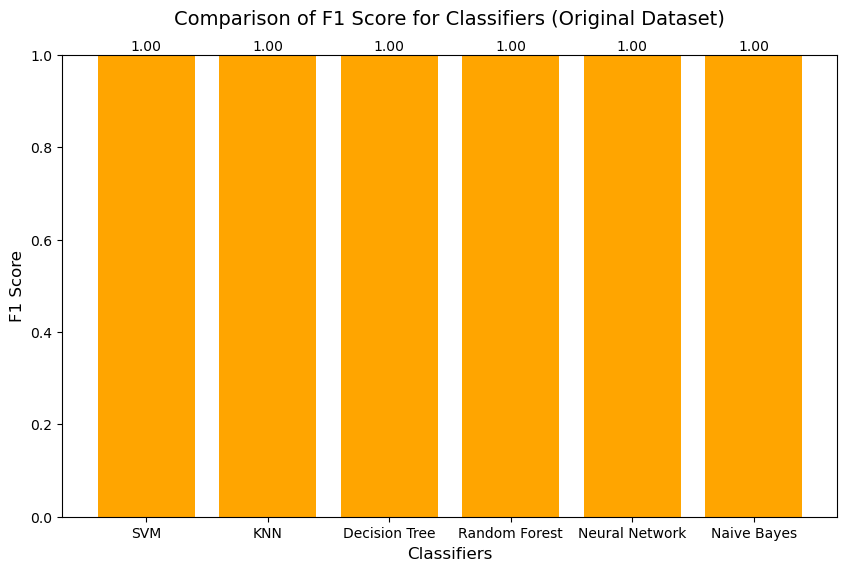

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ensure that X_train_original, y_train_original, X_test_original, y_test_original are defined and preprocessed

# Metrics storage for the original dataset
metrics_original = {
    "Classifier": ["SVM", "KNN", "Decision Tree", "Random Forest", "Neural Network", "Naive Bayes"],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
}

# Function to append metrics with rounding to 3 decimal places
def append_metrics_with_precision(classifier_name, accuracy, precision, recall, f1_score):
    metrics_original["Accuracy"].append(round(accuracy, 3))
    metrics_original["Precision"].append(round(precision, 3))
    metrics_original["Recall"].append(round(recall, 3))
    metrics_original["F1 Score"].append(round(f1_score, 3))

# Function to generate a random seed dynamically based on time or other factors
def generate_random_seed():
    return np.random.randint(0, 10000)  # Generating a random seed within a range

# Collect metrics for each classifier
# SVM
svm = SVC(random_state=generate_random_seed())
svm.fit(X_train_original, y_train_original)
y_pred_svm = svm.predict(X_test_original)
append_metrics_with_precision(
    "SVM",
    accuracy_score(y_test_original, y_pred_svm),
    precision_score(y_test_original, y_pred_svm, average="weighted"),
    recall_score(y_test_original, y_pred_svm, average="weighted"),
    f1_score(y_test_original, y_pred_svm, average="weighted"),
)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_original, y_train_original)
y_pred_knn = knn.predict(X_test_original)
append_metrics_with_precision(
    "KNN",
    accuracy_score(y_test_original, y_pred_knn),
    precision_score(y_test_original, y_pred_knn, average="weighted"),
    recall_score(y_test_original, y_pred_knn, average="weighted"),
    f1_score(y_test_original, y_pred_knn, average="weighted"),
)

# Decision Tree
dt = DecisionTreeClassifier(random_state=generate_random_seed())
dt.fit(X_train_original, y_train_original)
y_pred_dt = dt.predict(X_test_original)
append_metrics_with_precision(
    "Decision Tree",
    accuracy_score(y_test_original, y_pred_dt),
    precision_score(y_test_original, y_pred_dt, average="weighted"),
    recall_score(y_test_original, y_pred_dt, average="weighted"),
    f1_score(y_test_original, y_pred_dt, average="weighted"),
)

# Random Forest
rf = RandomForestClassifier(random_state=generate_random_seed())
rf.fit(X_train_original, y_train_original)
y_pred_rf = rf.predict(X_test_original)
append_metrics_with_precision(
    "Random Forest",
    accuracy_score(y_test_original, y_pred_rf),
    precision_score(y_test_original, y_pred_rf, average="weighted"),
    recall_score(y_test_original, y_pred_rf, average="weighted"),
    f1_score(y_test_original, y_pred_rf, average="weighted"),
)

# Neural Network
nn = MLPClassifier(random_state=generate_random_seed(), max_iter=500)
nn.fit(X_train_original, y_train_original)
y_pred_nn = nn.predict(X_test_original)
append_metrics_with_precision(
    "Neural Network",
    accuracy_score(y_test_original, y_pred_nn),
    precision_score(y_test_original, y_pred_nn, average="weighted"),
    recall_score(y_test_original, y_pred_nn, average="weighted"),
    f1_score(y_test_original, y_pred_nn, average="weighted"),
)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_original, y_train_original)
y_pred_nb = nb.predict(X_test_original)
append_metrics_with_precision(
    "Naive Bayes",
    accuracy_score(y_test_original, y_pred_nb),
    precision_score(y_test_original, y_pred_nb, average="weighted"),
    recall_score(y_test_original, y_pred_nb, average="weighted"),
    f1_score(y_test_original, y_pred_nb, average="weighted"),
)

# Convert metrics to a pandas DataFrame for better table printing
df_metrics_original = pd.DataFrame(metrics_original)

# Print the metrics table
print("Classifier Metrics (Original Dataset):")
print(df_metrics_original)

# Visualization of Metrics
def plot_metrics(metrics_dict, metric_name):
    classifiers = metrics_dict["Classifier"]
    values = metrics_dict[metric_name]
    
    plt.figure(figsize=(10, 6))
    plt.bar(classifiers, values, color="orange")
    plt.title(f"Comparison of {metric_name} for Classifiers (Original Dataset)\n", fontsize=14)
    plt.ylabel(metric_name, fontsize=12)
    plt.xlabel("Classifiers", fontsize=12)
    plt.ylim(0, 1)
    for i, v in enumerate(values):
        plt.text(i, v + 0.01, f"{v:.2f}", ha="center", fontsize=10)
    plt.show()

# Plot each metric
plot_metrics(metrics_original, "Accuracy")
plot_metrics(metrics_original, "Precision")
plot_metrics(metrics_original, "Recall")
plot_metrics(metrics_original, "F1 Score")


EVALUATION OF MIN IMPUTED DATASET

SVM Classification on min imputed dataset

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate SVM on a dataset
def svm_classification(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n### SVM Classification for {dataset_name} ###")
    
    # Train the SVM classifier
    svm = SVC()
    svm.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = svm.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform SVM classification and evaluation on the minimum imputed dataset
svm_classification(X_train_min, X_test_min, y_train_min, y_test_min, "Minimum Imputed Dataset")



### SVM Classification for Minimum Imputed Dataset ###
Accuracy: 0.9970
Precision: 0.9971
Recall: 0.9970
F1 Score: 0.9970
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       0.96      1.00      0.98        23
           3       1.00      1.00      1.00        17
           4       1.00      0.95      0.98        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        24
          11       1.00      1.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate KNN on a dataset
def knn_classification(X_train, X_test, y_train, y_test, dataset_name, n_neighbors=5):
    print(f"\n### KNN Classification for {dataset_name} ###")
    
    # Train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = knn.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform KNN classification and evaluation 
knn_classification(X_train_min, X_test_min, y_train_min, y_test_min, "Minimum Imputed Dataset")



### KNN Classification for Minimum Imputed Dataset ###
Accuracy: 0.9940
Precision: 0.9942
Recall: 0.9940
F1 Score: 0.9939
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       0.96      1.00      0.98        23
           3       1.00      1.00      1.00        17
           4       1.00      0.95      0.98        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        28
           9       0.96      1.00      0.98        26
          10       1.00      1.00      1.00        24
          11       1.00      1.

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate Decision Tree on a dataset
def decision_tree_classification(X_train, X_test, y_train, y_test, dataset_name, max_depth=None):
    print(f"\n### Decision Tree Classification for {dataset_name} ###")
    
    # Train the Decision Tree classifier
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = dt.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform Decision Tree classification and evaluation
decision_tree_classification(X_train_min, X_test_min, y_train_min, y_test_min, "Minimum Imputed Dataset")



### Decision Tree Classification for Minimum Imputed Dataset ###
Accuracy: 0.9789
Precision: 0.9806
Recall: 0.9789
F1 Score: 0.9790
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        17
           4       1.00      0.95      0.98        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27
           8       1.00      0.89      0.94        28
           9       0.96      0.96      0.96        26
          10       1.00      0.96      0.98        24
          11       1.

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate Naive Bayes on a dataset
def naive_bayes_classification(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n### Naive Bayes Classification for {dataset_name} ###")
    
    # Train the Naive Bayes classifier
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = nb.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=0)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform Naive Bayes classification on all datasets
naive_bayes_classification(X_train_min, X_test_min, y_train_min, y_test_min, "Minimum Imputed Dataset")



### Naive Bayes Classification for Minimum Imputed Dataset ###
Accuracy: 0.9970
Precision: 0.9971
Recall: 0.9970
F1 Score: 0.9970
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       0.96      1.00      0.98        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        24
          11       1.00

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate Neural Network on a dataset
def neural_network_classification(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n### Neural Network Classification for {dataset_name} ###")
    
    # Train the Neural Network classifier
    nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
    nn.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = nn.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=0)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform Neural Network classification on all datasets
neural_network_classification(X_train_min, X_test_min, y_train_min, y_test_min, "Minimum Imputed Dataset")



### Neural Network Classification for Minimum Imputed Dataset ###
Accuracy: 0.9960
Precision: 0.9962
Recall: 0.9960
F1 Score: 0.9960
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.96      1.00      0.98        24
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        17
           4       1.00      0.95      0.98        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        24
          11       1

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate Random Forest on a dataset
def random_forest_classification(X_train, X_test, y_train, y_test, dataset_name, n_estimators=100):
    print(f"\n### Random Forest Classification for {dataset_name} ###")
    
    # Train the Random Forest classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=70)
    rf.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = rf.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=0)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform Random Forest classification on all datasets
random_forest_classification(X_train_min, X_test_min, y_train_min, y_test_min, "Minimum Imputed Dataset")



### Random Forest Classification for Minimum Imputed Dataset ###
Accuracy: 0.9930
Precision: 0.9934
Recall: 0.9930
F1 Score: 0.9929
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       0.96      1.00      0.98        23
           3       1.00      1.00      1.00        17
           4       1.00      0.95      0.98        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        28
           9       1.00      0.88      0.94        26
          10       1.00      1.00      1.00        24
          11       1.

Classifier Metrics (Minimum Imputed Dataset):
       Classifier  Accuracy  Precision  Recall  F1 Score
0             SVM     0.997      0.997   0.997     0.997
1             KNN     0.994      0.994   0.994     0.994
2   Decision Tree     0.979      0.980   0.979     0.979
3   Random Forest     0.995      0.995   0.995     0.995
4  Neural Network     0.996      0.996   0.996     0.996
5     Naive Bayes     0.997      0.997   0.997     0.997


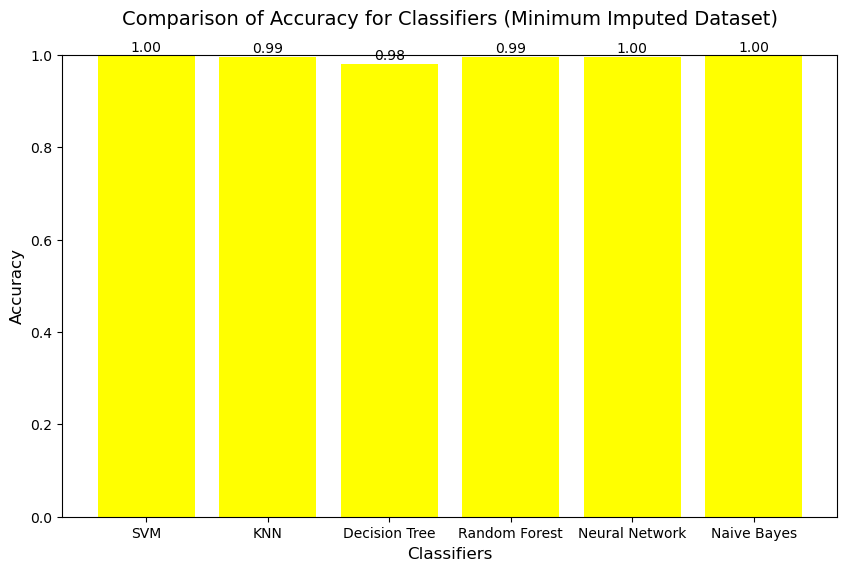

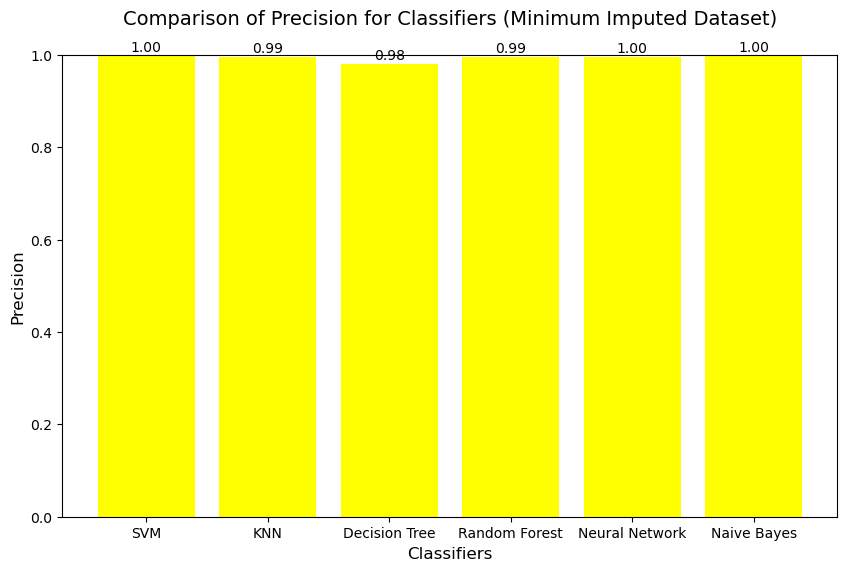

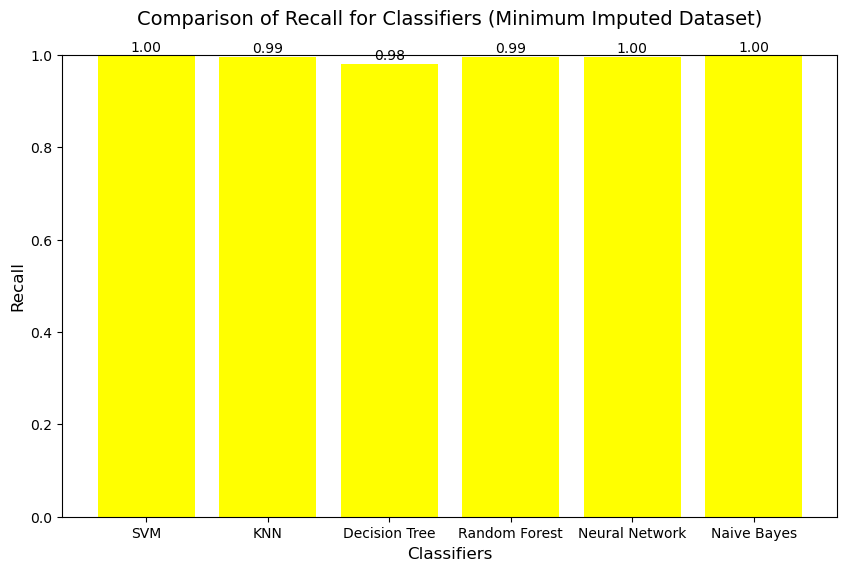

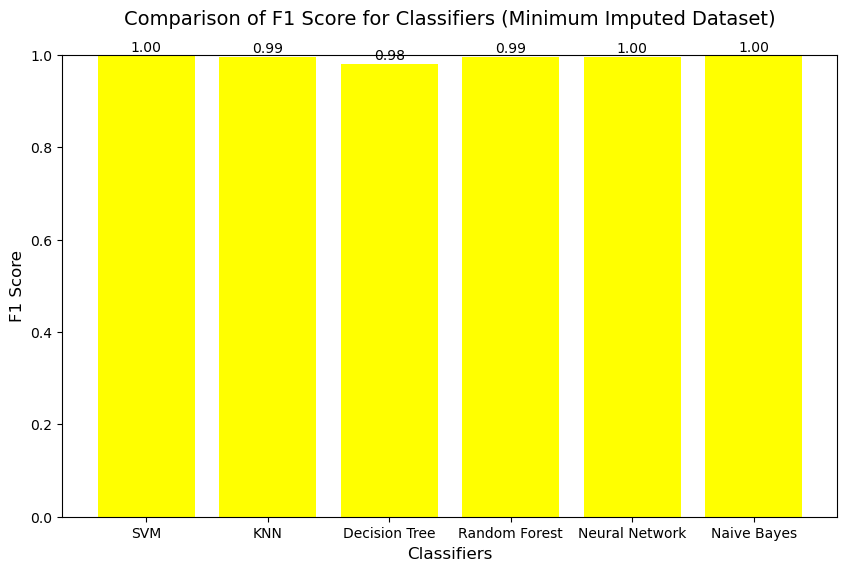

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ensure that X_train_min, y_train_min, X_test_min, y_test_min are defined and preprocessed

# Metrics storage for the minimum imputed dataset
metrics_min = {
    "Classifier": ["SVM", "KNN", "Decision Tree", "Random Forest", "Neural Network", "Naive Bayes"],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
}

# Function to append metrics with rounding to 3 decimal places
def append_metrics_with_precision(classifier_name, accuracy, precision, recall, f1_score):
    metrics_min["Accuracy"].append(round(accuracy, 3))
    metrics_min["Precision"].append(round(precision, 3))
    metrics_min["Recall"].append(round(recall, 3))
    metrics_min["F1 Score"].append(round(f1_score, 3))

# Function to generate a random seed dynamically based on time or other factors
def generate_random_seed():
    return np.random.randint(0, 10000)  # Generating a random seed within a range

# Collect metrics for each classifier
# SVM
svm = SVC(random_state=generate_random_seed())
svm.fit(X_train_min, y_train_min)
y_pred_svm = svm.predict(X_test_min)
append_metrics_with_precision(
    "SVM",
    accuracy_score(y_test_min, y_pred_svm),
    precision_score(y_test_min, y_pred_svm, average="weighted"),
    recall_score(y_test_min, y_pred_svm, average="weighted"),
    f1_score(y_test_min, y_pred_svm, average="weighted"),
)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_min, y_train_min)
y_pred_knn = knn.predict(X_test_min)
append_metrics_with_precision(
    "KNN",
    accuracy_score(y_test_min, y_pred_knn),
    precision_score(y_test_min, y_pred_knn, average="weighted"),
    recall_score(y_test_min, y_pred_knn, average="weighted"),
    f1_score(y_test_min, y_pred_knn, average="weighted"),
)

# Decision Tree
dt = DecisionTreeClassifier(random_state=generate_random_seed())
dt.fit(X_train_min, y_train_min)
y_pred_dt = dt.predict(X_test_min)
append_metrics_with_precision(
    "Decision Tree",
    accuracy_score(y_test_min, y_pred_dt),
    precision_score(y_test_min, y_pred_dt, average="weighted"),
    recall_score(y_test_min, y_pred_dt, average="weighted"),
    f1_score(y_test_min, y_pred_dt, average="weighted"),
)

# Random Forest
rf = RandomForestClassifier(random_state=generate_random_seed())
rf.fit(X_train_min, y_train_min)
y_pred_rf = rf.predict(X_test_min)
append_metrics_with_precision(
    "Random Forest",
    accuracy_score(y_test_min, y_pred_rf),
    precision_score(y_test_min, y_pred_rf, average="weighted"),
    recall_score(y_test_min, y_pred_rf, average="weighted"),
    f1_score(y_test_min, y_pred_rf, average="weighted"),
)

# Neural Network
nn = MLPClassifier(random_state=generate_random_seed(), max_iter=500)
nn.fit(X_train_min, y_train_min)
y_pred_nn = nn.predict(X_test_min)
append_metrics_with_precision(
    "Neural Network",
    accuracy_score(y_test_min, y_pred_nn),
    precision_score(y_test_min, y_pred_nn, average="weighted"),
    recall_score(y_test_min, y_pred_nn, average="weighted"),
    f1_score(y_test_min, y_pred_nn, average="weighted"),
)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_min, y_train_min)
y_pred_nb = nb.predict(X_test_min)
append_metrics_with_precision(
    "Naive Bayes",
    accuracy_score(y_test_min, y_pred_nb),
    precision_score(y_test_min, y_pred_nb, average="weighted"),
    recall_score(y_test_min, y_pred_nb, average="weighted"),
    f1_score(y_test_min, y_pred_nb, average="weighted"),
)

# Convert metrics to a pandas DataFrame for better table printing
df_metrics_min = pd.DataFrame(metrics_min)

# Print the metrics table
print("Classifier Metrics (Minimum Imputed Dataset):")
print(df_metrics_min)

# Visualization of Metrics
def plot_metrics(metrics_dict, metric_name):
    classifiers = metrics_dict["Classifier"]
    values = metrics_dict[metric_name]
    
    plt.figure(figsize=(10, 6))
    plt.bar(classifiers, values, color="yellow")
    plt.title(f"Comparison of {metric_name} for Classifiers (Minimum Imputed Dataset)\n", fontsize=14)
    plt.ylabel(metric_name, fontsize=12)
    plt.xlabel("Classifiers", fontsize=12)
    plt.ylim(0, 1)
    for i, v in enumerate(values):
        plt.text(i, v + 0.01, f"{v:.2f}", ha="center", fontsize=10)
    plt.show()

# Plot each metric
plot_metrics(metrics_min, "Accuracy")
plot_metrics(metrics_min, "Precision")
plot_metrics(metrics_min, "Recall")
plot_metrics(metrics_min, "F1 Score")

EVALUATION OF MAX IMPUTED DATASET

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate SVM on a dataset
def svm_classification(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n### SVM Classification for {dataset_name} ###")
    
    # Train the SVM classifier
    svm = SVC()
    svm.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = svm.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform SVM classification and evaluation on the minimum imputed dataset
svm_classification(X_train_max, X_test_max, y_train_max, y_test_max, "Maximum Imputed Dataset")



### SVM Classification for Maximum Imputed Dataset ###
Accuracy: 0.9869
Precision: 0.9877
Recall: 0.9869
F1 Score: 0.9870
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 22  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       1.00      0.91      0.95        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        28
           9       0.96      0.92      0.94        26
          10       1.00      1.00      1.00        24
          11       1.00      1.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate KNN on a dataset
def knn_classification(X_train, X_test, y_train, y_test, dataset_name, n_neighbors=5):
    print(f"\n### KNN Classification for {dataset_name} ###")
    
    # Train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = knn.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform KNN classification and evaluation 
knn_classification(X_train_max, X_test_max, y_train_max, y_test_max, "Maximum Imputed Dataset")


### KNN Classification for Maximum Imputed Dataset ###
Accuracy: 0.9748
Precision: 0.9763
Recall: 0.9748
F1 Score: 0.9748
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.96      1.00      0.98        24
           2       1.00      0.96      0.98        23
           3       0.94      1.00      0.97        17
           4       1.00      1.00      1.00        22
           5       0.97      1.00      0.98        32
           6       1.00      1.00      1.00        25
           7       0.96      1.00      0.98        27
           8       1.00      1.00      1.00        28
           9       0.87      1.00      0.93        26
          10       1.00      1.00      1.00        24
          11       1.00      1.

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate Decision Tree on a dataset
def decision_tree_classification(X_train, X_test, y_train, y_test, dataset_name, max_depth=None):
    print(f"\n### Decision Tree Classification for {dataset_name} ###")
    
    # Train the Decision Tree classifier
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = dt.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform Decision Tree classification and evaluation
decision_tree_classification(X_train_max, X_test_max, y_train_max, y_test_max, "Maximum Imputed Dataset")



### Decision Tree Classification for Maximum Imputed Dataset ###
Accuracy: 0.4773
Precision: 0.7435
Recall: 0.4773
F1 Score: 0.5202
Confusion Matrix:
[[ 9  0  0 ...  1  0  0]
 [ 0  6  0 ...  2  0  0]
 [ 0  1  6 ...  0  0  0]
 ...
 [ 0  1  0 ...  6  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.41      0.58        22
           1       0.43      0.25      0.32        24
           2       0.86      0.26      0.40        23
           3       0.75      0.35      0.48        17
           4       0.75      0.41      0.53        22
           5       0.91      0.31      0.47        32
           6       0.67      0.32      0.43        25
           7       0.82      0.52      0.64        27
           8       0.86      0.86      0.86        28
           9       0.19      0.85      0.31        26
          10       1.00      0.71      0.83        24
          11       0.

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate Naive Bayes on a dataset
def naive_bayes_classification(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n### Naive Bayes Classification for {dataset_name} ###")
    
    # Train the Naive Bayes classifier
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = nb.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=0)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform Naive Bayes classification on all datasets
naive_bayes_classification(X_train_max, X_test_max, y_train_max, y_test_max, "Maximum Imputed Dataset")



### Naive Bayes Classification for Maximum Imputed Dataset ###
Accuracy: 0.5539
Precision: 0.8913
Recall: 0.5539
F1 Score: 0.6222
Confusion Matrix:
[[11  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        22
           1       0.83      0.42      0.56        24
           2       0.89      0.35      0.50        23
           3       1.00      0.41      0.58        17
           4       0.85      0.50      0.63        22
           5       1.00      0.41      0.58        32
           6       1.00      0.36      0.53        25
           7       1.00      0.56      0.71        27
           8       0.97      1.00      0.98        28
           9       0.24      0.88      0.38        26
          10       1.00      0.71      0.83        24
          11       0.95

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate Neural Network on a dataset
def neural_network_classification(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n### Neural Network Classification for {dataset_name} ###")
    
    # Train the Neural Network classifier
    nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
    nn.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = nn.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=0)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform Neural Network classification on all datasets
neural_network_classification(X_train_max, X_test_max, y_train_max, y_test_max, "Maximum Imputed Dataset")



### Neural Network Classification for Maximum Imputed Dataset ###
Accuracy: 0.9778
Precision: 0.9801
Recall: 0.9778
F1 Score: 0.9783
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 22  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       1.00      0.91      0.95        23
           3       1.00      0.94      0.97        17
           4       0.96      1.00      0.98        22
           5       1.00      0.97      0.98        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        28
           9       0.83      0.92      0.87        26
          10       1.00      1.00      1.00        24
          11       1

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate Random Forest on a dataset
def random_forest_classification(X_train, X_test, y_train, y_test, dataset_name, n_estimators=100):
    print(f"\n### Random Forest Classification for {dataset_name} ###")
    
    # Train the Random Forest classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=70)
    rf.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = rf.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=0)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform Random Forest classification on all datasets
random_forest_classification(X_train_max, X_test_max, y_train_max, y_test_max, "Maximum Imputed Dataset")



### Random Forest Classification for Maximum Imputed Dataset ###
Accuracy: 0.8832
Precision: 0.9421
Recall: 0.8832
F1 Score: 0.8935
Confusion Matrix:
[[21  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 0  0  0 ... 14  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 19]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.94      0.62      0.75        24
           2       0.89      0.35      0.50        23
           3       1.00      0.88      0.94        17
           4       1.00      0.73      0.84        22
           5       1.00      0.72      0.84        32
           6       1.00      1.00      1.00        25
           7       1.00      0.96      0.98        27
           8       0.97      1.00      0.98        28
           9       0.51      0.92      0.66        26
          10       1.00      1.00      1.00        24
          11       1.

Classifier Metrics (Maximum Imputed Dataset):
       Classifier  Accuracy  Precision  Recall  F1 Score
0             SVM     0.987      0.988   0.987     0.987
1             KNN     0.975      0.976   0.975     0.975
2   Decision Tree     0.476      0.730   0.476     0.514
3   Random Forest     0.896      0.948   0.896     0.905
4  Neural Network     0.980      0.982   0.980     0.980
5     Naive Bayes     0.554      0.891   0.554     0.622


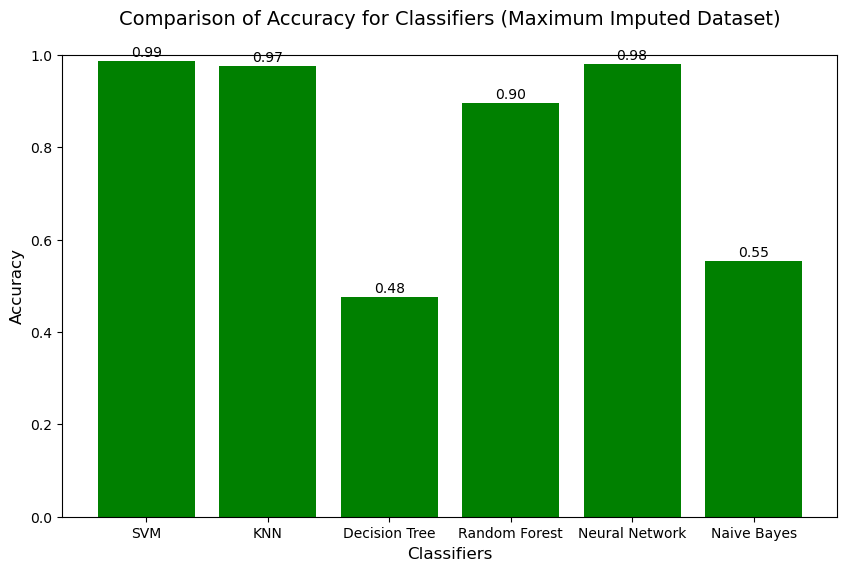

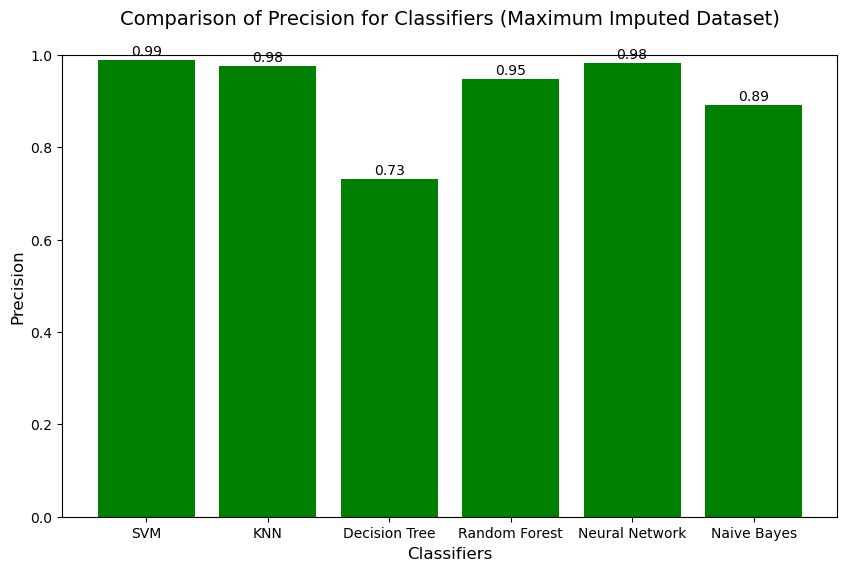

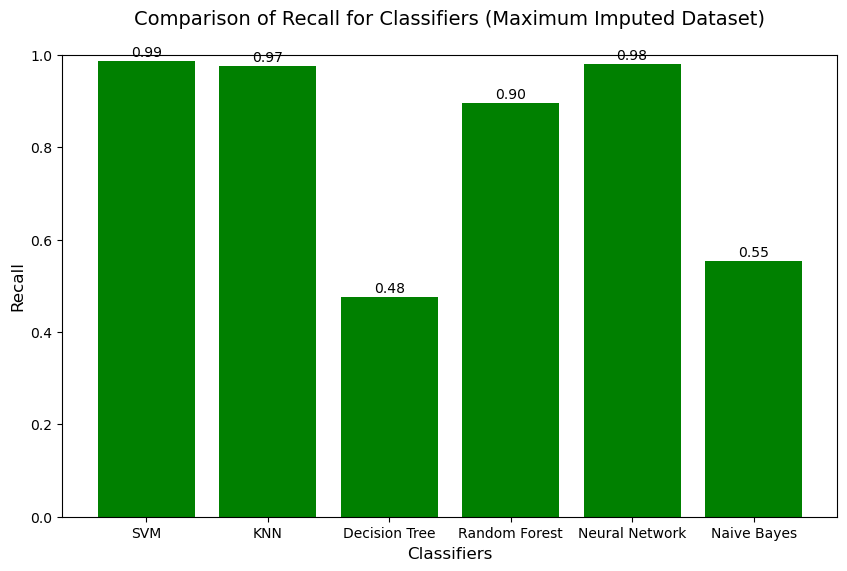

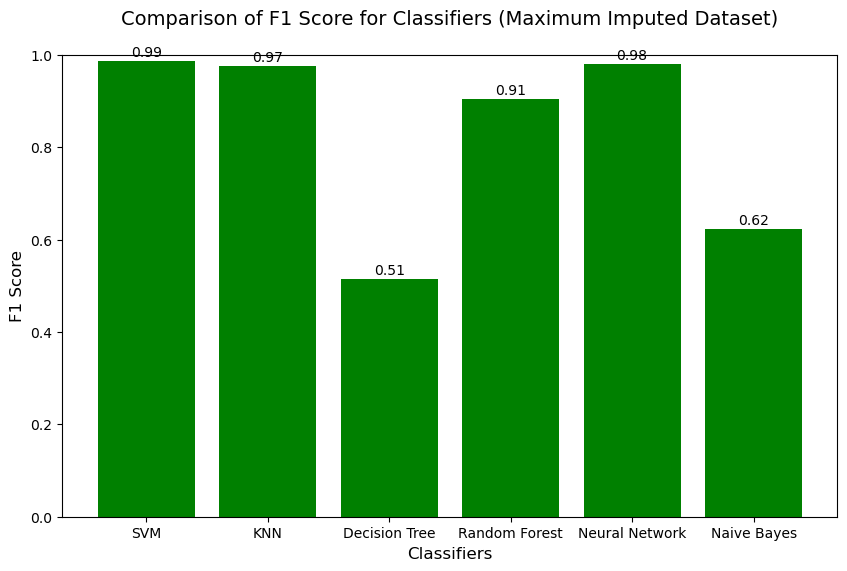

In [33]:
# Metrics storage for the maximum imputed dataset
metrics_max = {
    "Classifier": ["SVM", "KNN", "Decision Tree", "Random Forest", "Neural Network", "Naive Bayes"],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
}

# Function to append metrics with rounding to 3 decimal places
def append_metrics_max(classifier_name, accuracy, precision, recall, f1_score):
    metrics_max["Accuracy"].append(round(accuracy, 3))
    metrics_max["Precision"].append(round(precision, 3))
    metrics_max["Recall"].append(round(recall, 3))
    metrics_max["F1 Score"].append(round(f1_score, 3))

# Collect metrics for each classifier
# SVM
svm = SVC(random_state=generate_random_seed())
svm.fit(X_train_max, y_train_max)
y_pred_svm = svm.predict(X_test_max)
append_metrics_max(
    "SVM",
    accuracy_score(y_test_max, y_pred_svm),
    precision_score(y_test_max, y_pred_svm, average="weighted"),
    recall_score(y_test_max, y_pred_svm, average="weighted"),
    f1_score(y_test_max, y_pred_svm, average="weighted"),
)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_max, y_train_max)
y_pred_knn = knn.predict(X_test_max)
append_metrics_max(
    "KNN",
    accuracy_score(y_test_max, y_pred_knn),
    precision_score(y_test_max, y_pred_knn, average="weighted"),
    recall_score(y_test_max, y_pred_knn, average="weighted"),
    f1_score(y_test_max, y_pred_knn, average="weighted"),
)

# Decision Tree
dt = DecisionTreeClassifier(random_state=generate_random_seed())
dt.fit(X_train_max, y_train_max)
y_pred_dt = dt.predict(X_test_max)
append_metrics_max(
    "Decision Tree",
    accuracy_score(y_test_max, y_pred_dt),
    precision_score(y_test_max, y_pred_dt, average="weighted"),
    recall_score(y_test_max, y_pred_dt, average="weighted"),
    f1_score(y_test_max, y_pred_dt, average="weighted"),
)

# Random Forest
rf = RandomForestClassifier(random_state=generate_random_seed())
rf.fit(X_train_max, y_train_max)
y_pred_rf = rf.predict(X_test_max)
append_metrics_max(
    "Random Forest",
    accuracy_score(y_test_max, y_pred_rf),
    precision_score(y_test_max, y_pred_rf, average="weighted"),
    recall_score(y_test_max, y_pred_rf, average="weighted"),
    f1_score(y_test_max, y_pred_rf, average="weighted"),
)

# Neural Network
nn = MLPClassifier(random_state=generate_random_seed(), max_iter=500)
nn.fit(X_train_max, y_train_max)
y_pred_nn = nn.predict(X_test_max)
append_metrics_max(
    "Neural Network",
    accuracy_score(y_test_max, y_pred_nn),
    precision_score(y_test_max, y_pred_nn, average="weighted"),
    recall_score(y_test_max, y_pred_nn, average="weighted"),
    f1_score(y_test_max, y_pred_nn, average="weighted"),
)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_max, y_train_max)
y_pred_nb = nb.predict(X_test_max)
append_metrics_max(
    "Naive Bayes",
    accuracy_score(y_test_max, y_pred_nb),
    precision_score(y_test_max, y_pred_nb, average="weighted"),
    recall_score(y_test_max, y_pred_nb, average="weighted"),
    f1_score(y_test_max, y_pred_nb, average="weighted"),
)

# Convert metrics to a pandas DataFrame for better table printing
df_metrics_max = pd.DataFrame(metrics_max)

# Print the metrics table
print("Classifier Metrics (Maximum Imputed Dataset):")
print(df_metrics_max)

# Visualization of Metrics
def plot_metrics_max(metrics_dict, metric_name):
    classifiers = metrics_dict["Classifier"]
    values = metrics_dict[metric_name]
    
    plt.figure(figsize=(10, 6))
    plt.bar(classifiers, values, color="green")
    plt.title(f"Comparison of {metric_name} for Classifiers (Maximum Imputed Dataset)\n", fontsize=14)
    plt.ylabel(metric_name, fontsize=12)
    plt.xlabel("Classifiers", fontsize=12)
    plt.ylim(0, 1)
    for i, v in enumerate(values):
        plt.text(i, v + 0.01, f"{v:.2f}", ha="center", fontsize=10)
    plt.show()

# Plot each metric
plot_metrics_max(metrics_max, "Accuracy")
plot_metrics_max(metrics_max, "Precision")
plot_metrics_max(metrics_max, "Recall")
plot_metrics_max(metrics_max, "F1 Score")


EVALUATION FOR MODE IMPUTED DATASET:

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate SVM on a dataset
def svm_classification(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n### SVM Classification for {dataset_name} ###")
    
    # Train the SVM classifier
    svm = SVC()
    svm.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = svm.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform SVM classification and evaluation on the minimum imputed dataset
svm_classification(X_train_mode, X_test_mode, y_train_mode, y_test_mode, "Mode Imputed Dataset")



### SVM Classification for Mode Imputed Dataset ###
Accuracy: 0.9970
Precision: 0.9971
Recall: 0.9970
F1 Score: 0.9970
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       0.96      1.00      0.98        23
           3       1.00      1.00      1.00        17
           4       1.00      0.95      0.98        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        24
          11       1.00      1.00 

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate KNN on a dataset
def knn_classification(X_train, X_test, y_train, y_test, dataset_name, n_neighbors=5):
    print(f"\n### KNN Classification for {dataset_name} ###")
    
    # Train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = knn.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform KNN classification and evaluation 
knn_classification(X_train_mode, X_test_mode, y_train_mode, y_test_mode, "Mode Imputed Dataset")


### KNN Classification for Mode Imputed Dataset ###
Accuracy: 0.9940
Precision: 0.9942
Recall: 0.9940
F1 Score: 0.9939
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       0.96      1.00      0.98        23
           3       1.00      1.00      1.00        17
           4       1.00      0.95      0.98        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        28
           9       0.96      1.00      0.98        26
          10       1.00      1.00      1.00        24
          11       1.00      1.00 

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate Decision Tree on a dataset
def decision_tree_classification(X_train, X_test, y_train, y_test, dataset_name, max_depth=None):
    print(f"\n### Decision Tree Classification for {dataset_name} ###")
    
    # Train the Decision Tree classifier
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = dt.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform Decision Tree classification and evaluation
decision_tree_classification(X_train_mode, X_test_mode, y_train_mode, y_test_mode, "Mode Imputed Dataset")



### Decision Tree Classification for Mode Imputed Dataset ###
Accuracy: 0.9778
Precision: 0.9798
Recall: 0.9778
F1 Score: 0.9779
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       0.96      1.00      0.98        24
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        17
           4       1.00      0.95      0.98        22
           5       1.00      0.97      0.98        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27
           8       1.00      0.89      0.94        28
           9       1.00      0.88      0.94        26
          10       1.00      1.00      1.00        24
          11       1.00 

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate Naive Bayes on a dataset
def naive_bayes_classification(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n### Naive Bayes Classification for {dataset_name} ###")
    
    # Train the Naive Bayes classifier
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = nb.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=0)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform Naive Bayes classification on all datasets
naive_bayes_classification(X_train_mode, X_test_mode, y_train_mode, y_test_mode, "Mode Imputed Dataset")



### Naive Bayes Classification for Mode Imputed Dataset ###
Accuracy: 0.9970
Precision: 0.9971
Recall: 0.9970
F1 Score: 0.9970
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       0.96      1.00      0.98        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        24
          11       1.00   

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate Neural Network on a dataset
def neural_network_classification(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n### Neural Network Classification for {dataset_name} ###")
    
    # Train the Neural Network classifier
    nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
    nn.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = nn.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=0)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform Neural Network classification on all datasets
neural_network_classification(X_train_mode, X_test_mode, y_train_mode, y_test_mode, "Mode Imputed Dataset")



### Neural Network Classification for Mode Imputed Dataset ###
Accuracy: 0.9960
Precision: 0.9962
Recall: 0.9960
F1 Score: 0.9960
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        17
           4       1.00      0.95      0.98        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        24
          11       1.00

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Function to train and evaluate Random Forest on a dataset
def random_forest_classification(X_train, X_test, y_train, y_test, dataset_name, n_estimators=100):
    print(f"\n### Random Forest Classification for {dataset_name} ###")
    
    # Train the Random Forest classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=70)
    rf.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = rf.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=0)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Perform Random Forest classification on all datasets
random_forest_classification(X_train_mode, X_test_mode, y_train_mode, y_test_mode, "Mode Imputed Dataset")



### Random Forest Classification for Mode Imputed Dataset ###
Accuracy: 0.9930
Precision: 0.9934
Recall: 0.9930
F1 Score: 0.9929
Confusion Matrix:
[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       0.96      1.00      0.98        23
           3       1.00      1.00      1.00        17
           4       1.00      0.95      0.98        22
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        28
           9       1.00      0.88      0.94        26
          10       1.00      1.00      1.00        24
          11       1.00 

Classifier Metrics (Mode Imputed Dataset):
       Classifier  Accuracy  Precision  Recall  F1 Score
0             SVM     0.997      0.997   0.997     0.997
1             KNN     0.994      0.994   0.994     0.994
2   Decision Tree     0.974      0.976   0.974     0.974
3   Random Forest     0.994      0.994   0.994     0.994
4  Neural Network     0.996      0.996   0.996     0.996
5     Naive Bayes     0.997      0.997   0.997     0.997


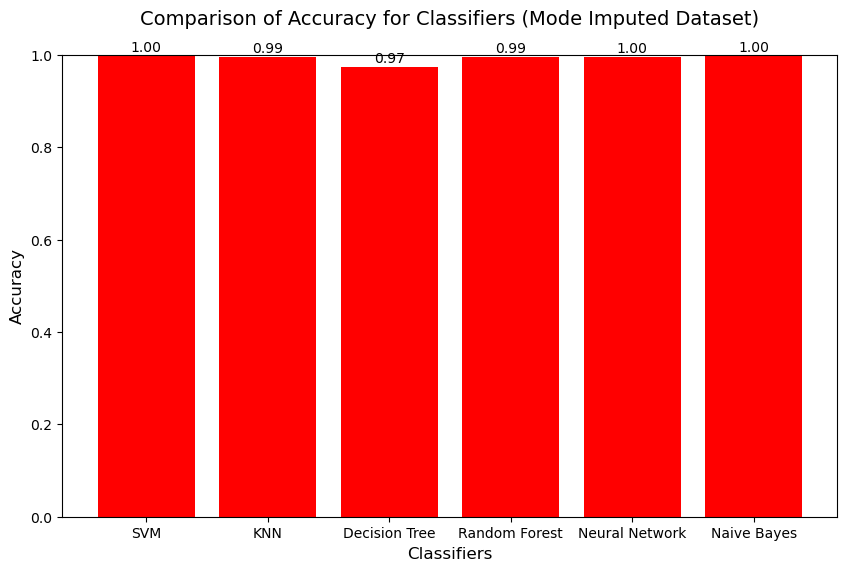

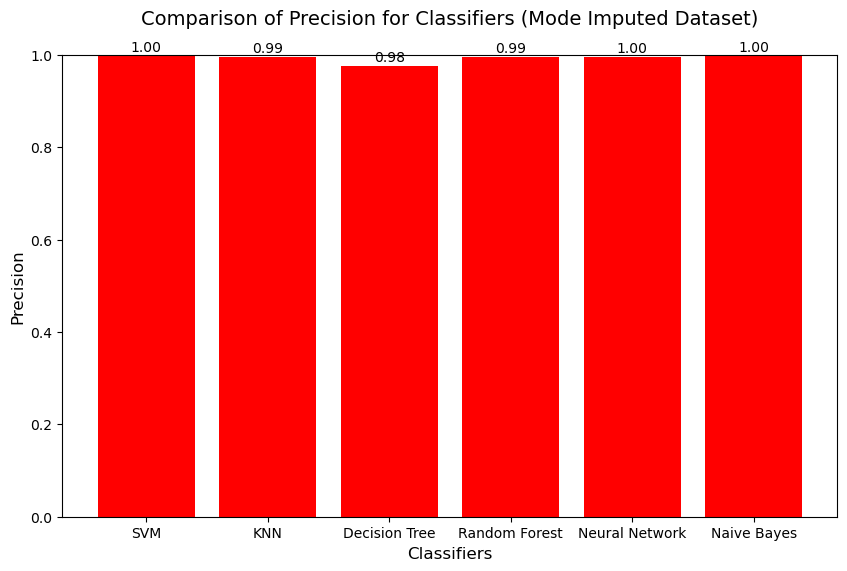

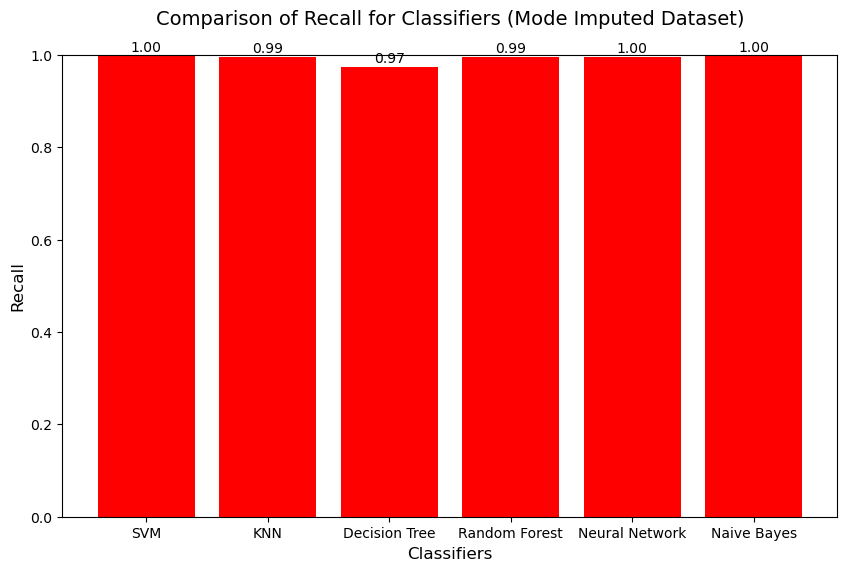

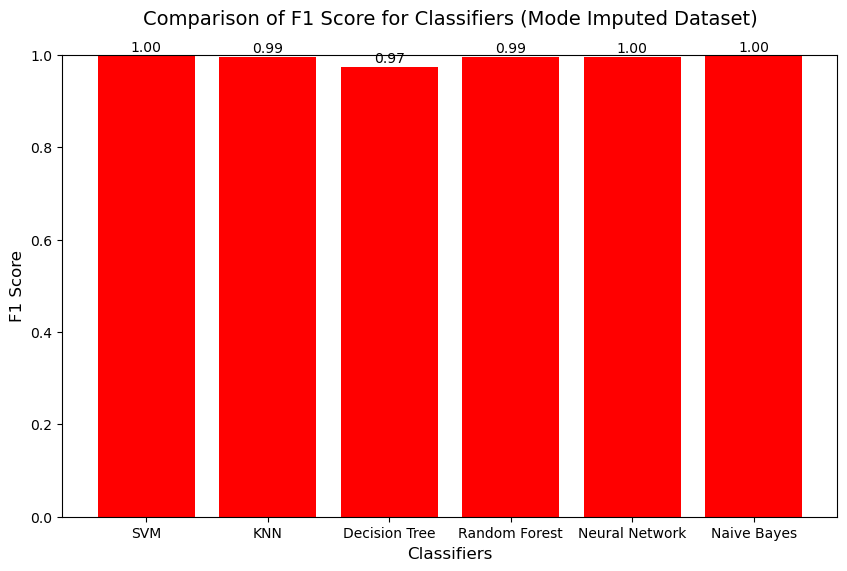

In [40]:
# Metrics storage for the mode imputed dataset
metrics_mode = {
    "Classifier": ["SVM", "KNN", "Decision Tree", "Random Forest", "Neural Network", "Naive Bayes"],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
}

# Function to append metrics with rounding to 3 decimal places
def append_metrics_mode(classifier_name, accuracy, precision, recall, f1_score):
    metrics_mode["Accuracy"].append(round(accuracy, 3))
    metrics_mode["Precision"].append(round(precision, 3))
    metrics_mode["Recall"].append(round(recall, 3))
    metrics_mode["F1 Score"].append(round(f1_score, 3))

# Collect metrics for each classifier
# SVM
svm = SVC(random_state=generate_random_seed())
svm.fit(X_train_mode, y_train_mode)
y_pred_svm = svm.predict(X_test_mode)
append_metrics_mode(
    "SVM",
    accuracy_score(y_test_mode, y_pred_svm),
    precision_score(y_test_mode, y_pred_svm, average="weighted"),
    recall_score(y_test_mode, y_pred_svm, average="weighted"),
    f1_score(y_test_mode, y_pred_svm, average="weighted"),
)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_mode, y_train_mode)
y_pred_knn = knn.predict(X_test_mode)
append_metrics_mode(
    "KNN",
    accuracy_score(y_test_mode, y_pred_knn),
    precision_score(y_test_mode, y_pred_knn, average="weighted"),
    recall_score(y_test_mode, y_pred_knn, average="weighted"),
    f1_score(y_test_mode, y_pred_knn, average="weighted"),
)

# Decision Tree
dt = DecisionTreeClassifier(random_state=generate_random_seed())
dt.fit(X_train_mode, y_train_mode)
y_pred_dt = dt.predict(X_test_mode)
append_metrics_mode(
    "Decision Tree",
    accuracy_score(y_test_mode, y_pred_dt),
    precision_score(y_test_mode, y_pred_dt, average="weighted"),
    recall_score(y_test_mode, y_pred_dt, average="weighted"),
    f1_score(y_test_mode, y_pred_dt, average="weighted"),
)

# Random Forest
rf = RandomForestClassifier(random_state=generate_random_seed())
rf.fit(X_train_mode, y_train_mode)
y_pred_rf = rf.predict(X_test_mode)
append_metrics_mode(
    "Random Forest",
    accuracy_score(y_test_mode, y_pred_rf),
    precision_score(y_test_mode, y_pred_rf, average="weighted"),
    recall_score(y_test_mode, y_pred_rf, average="weighted"),
    f1_score(y_test_mode, y_pred_rf, average="weighted"),
)

# Neural Network
nn = MLPClassifier(random_state=generate_random_seed(), max_iter=500)
nn.fit(X_train_mode, y_train_mode)
y_pred_nn = nn.predict(X_test_mode)
append_metrics_mode(
    "Neural Network",
    accuracy_score(y_test_mode, y_pred_nn),
    precision_score(y_test_mode, y_pred_nn, average="weighted"),
    recall_score(y_test_mode, y_pred_nn, average="weighted"),
    f1_score(y_test_mode, y_pred_nn, average="weighted"),
)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_mode, y_train_mode)
y_pred_nb = nb.predict(X_test_mode)
append_metrics_mode(
    "Naive Bayes",
    accuracy_score(y_test_mode, y_pred_nb),
    precision_score(y_test_mode, y_pred_nb, average="weighted"),
    recall_score(y_test_mode, y_pred_nb, average="weighted"),
    f1_score(y_test_mode, y_pred_nb, average="weighted"),
)

# Convert metrics to a pandas DataFrame for better table printing
df_metrics_mode = pd.DataFrame(metrics_mode)

# Print the metrics table
print("Classifier Metrics (Mode Imputed Dataset):")
print(df_metrics_mode)

# Visualization of Metrics
def plot_metrics_mode(metrics_dict, metric_name):
    classifiers = metrics_dict["Classifier"]
    values = metrics_dict[metric_name]
    
    plt.figure(figsize=(10, 6))
    plt.bar(classifiers, values, color="red")
    plt.title(f"Comparison of {metric_name} for Classifiers (Mode Imputed Dataset)\n", fontsize=14)
    plt.ylabel(metric_name, fontsize=12)
    plt.xlabel("Classifiers", fontsize=12)
    plt.ylim(0, 1)
    for i, v in enumerate(values):
        plt.text(i, v + 0.01, f"{v:.2f}", ha="center", fontsize=10)
    plt.show()

# Plot each metric
plot_metrics_mode(metrics_mode, "Accuracy")
plot_metrics_mode(metrics_mode, "Precision")
plot_metrics_mode(metrics_mode, "Recall")
plot_metrics_mode(metrics_mode, "F1 Score")


In [41]:
# General info about the dataset
print("Dataset Info:")
print(df_original.info())
print("\n")

# Shape of the dataset
print(f"Number of Rows: {df_original.shape[0]}")
print(f"Number of Columns: {df_original.shape[1]}")
print("\n")

# First few rows of the dataset
print("Sample Rows:")
print(df_original.head())
print("\n")

# Columns and their data types
print("Columns and Data Types:")
print(df_original.dtypes)
print("\n")

# Check for missing values
print("Missing Values in Each Column:")
print(df_original.isnull().sum())
print("\n")

# Statistical summary of numerical columns
print("Statistical Summary (Numerical Features):")
print(df_original.describe())
print("\n")

# Check for unique values in categorical columns
print("Unique Values in Each Column:")
for col in df_original.select_dtypes(include=['object']).columns:
    print(f"{col}: {df_original[col].unique()}")
print("\n")

# Check the target variable distribution
target_column = "prognosis"  # Replace with the name of your target column
if target_column in df_original.columns:
    print(f"Distribution of Target Column (prognosis):")
    print(df_original[target_column].value_counts())
else:
    print(f"Target column 'prognosis' not found in the dataset.")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Columns: 133 entries, itching to prognosis
dtypes: int32(1), int64(132)
memory usage: 5.0 MB
None


Number of Rows: 4962
Number of Columns: 133


Sample Rows:
   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        0          0                     0                    0          0   
1        0          0                     0                    0          0   
2        1          1                     0                    0          0   
3        0          0                     0                    0          0   
4        0          0                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             1        0                 0  .